In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#fb = pd.DataFrame.from_csv('../data/facebook.csv')
#ms = pd.DataFrame.from_csv('../data/microsoft.csv')
fb = pd.read_csv('../data/facebook.csv', index_col=0)
ms = pd.read_csv('../data/microsoft.csv',index_col=0)

## Create a new column in the DataFrame (1) - Price difference

In [5]:
#Create a new column PriceDiff in the DataFrame fb
fb['PriceDiff'] = fb['Close'].shift(-1) - fb['Close']

In [6]:
#Your turn to create PriceDiff in the DataFrame ms
ms['PriceDiff'] = ms['Close'].shift(-1) - ms['Close']

In [7]:
#Run this code to display the price difference of Microsoft on 2015-01-05
print(ms['PriceDiff'].loc['2015-01-05'])

-0.6799999999999997


** Expected Output: ** -0.68

In [8]:
ms['Close']

Date
2014-12-31    46.450001
2015-01-02    46.759998
2015-01-05    46.330002
2015-01-06    45.650002
2015-01-07    46.230000
                ...    
2018-01-30    92.739998
2018-01-31    95.010002
2018-02-01    94.260002
2018-02-02    91.779999
2018-02-05    88.000000
Name: Close, Length: 780, dtype: float64

In [12]:
ms['Close'].shift(-1)

Date
2014-12-31    46.759998
2015-01-02    46.330002
2015-01-05    45.650002
2015-01-06    46.230000
2015-01-07    47.590000
                ...    
2018-01-30    95.010002
2018-01-31    94.260002
2018-02-01    91.779999
2018-02-02    88.000000
2018-02-05          NaN
Name: Close, Length: 780, dtype: float64

## Create a new column in the DataFrame (2) - Daily return

Daily Return is calcuated as PriceDiff/Close

In [18]:
#Create a new column Return in the DataFrame fb
fb['Return'] = fb['PriceDiff']/fb['Close']

In [19]:
#Your turn to create a new column Return in the DataFrame MS
ms['Return'] = ms['PriceDiff']/ms['Close']

In [20]:
#Run this code to print the return on 2015-01-05
print(ms['Return'].loc['2015-01-05'])

-0.014677314281143345


** Expected Output: ** -0.0146773142811

## Create a new column in the DataFrame using List Comprehension - Direction

In [ ]:
#Create a new column Direction. 
#The List Comprehension means : if the price difference is larger than 0, denote as 1, otherwise, denote as 0,
#for every record in the DataFrame - fb

fb['Direction'] = [1 if fb['PriceDiff'].loc[ei] > 0 else 0 for ei in fb.index ]

In [21]:
# Your turn to create a new column Direction for MS

ms['Direction'] = [1 if ms['PriceDiff'].loc[ei] > 0 else 0 for ei in ms.index]

In [22]:
# Run the following code to show the price difference on 2015-01-05
print('Price difference on {} is {}. direction is {}'.format('2015-01-05', ms['PriceDiff'].loc['2015-01-05'], ms['Direction'].loc['2015-01-05']))

Price difference on 2015-01-05 is -0.6799999999999997. direction is 0


** Expected Output: ** Price difference on 2015-01-05 is -0.6799999999999997. direction is 0

## Create a new column in the DataFrame using Rolling Window calculation (.rolling()) - Moving average

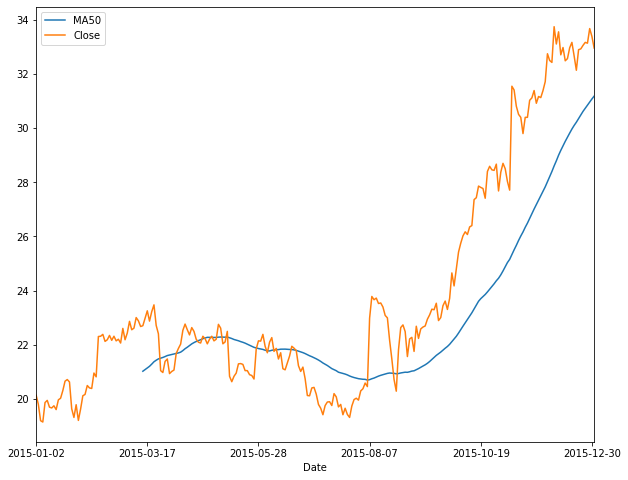

In [28]:
fb['ma50'] = fb['Close'].rolling(50).mean()

#plot the moving average
plt.figure(figsize=(10, 8))
fb['ma50'].loc['2015-01-01':'2015-12-31'].plot(label='MA50')
fb['Close'].loc['2015-01-01':'2015-12-31'].plot(label='Close')
plt.legend()
plt.show()

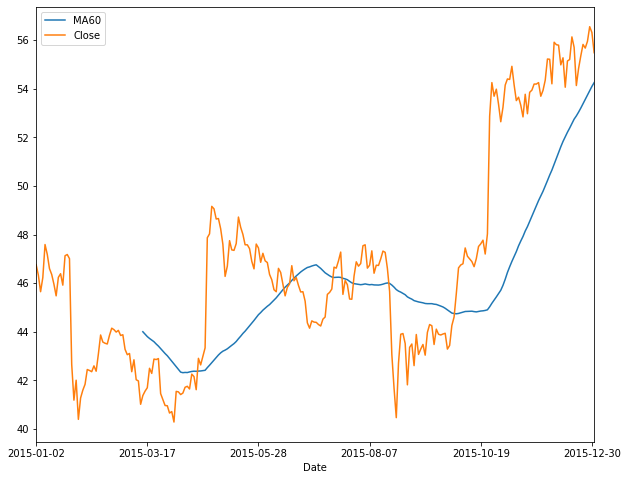

In [29]:
# You can use .rolling() to calculate any numbers of days' Moving Average. This is your turn to calculate "60 days"
# moving average of Microsoft, rename it as "ma60". And follow the codes above in plotting a graph

ms['ma60'] = ms['Close'].rolling(50).mean()

#plot the moving average
plt.figure(figsize=(10, 8))
ms['ma60'].loc['2015-01-01':'2015-12-31'].plot(label='MA60')
ms['Close'].loc['2015-01-01':'2015-12-31'].plot(label='Close')
plt.legend()
plt.show()

** Expected Output: **

<img src="MA.png">